In [87]:
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Get overview of data and missing values

In [88]:
print('train_data')
print(train_data.isnull().sum())
print('-'*20)
print('test_data')
print(test_data.isnull().sum())
datasets = [train_data,test_data]

train_data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
test_data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Complete Data

In [89]:
for dataset in datasets:
    dataset['Age'].fillna(value=dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(value=dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(value=dataset['Fare'].median(), inplace=True)

## Check

In [90]:
print('train_data')
print(train_data.isnull().sum())
print('-'*20)
print('test_data')
print(test_data.isnull().sum())

train_data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
--------------------
test_data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## Feature to choose
* Survived
* Pclass
* Sex : male=0,female=1
* Age
* SibSp
* Parch
* Fare
* Embarked S = (1,0,0), C = (0,1,0), Q = (0,0,1)
* Name Title
## Feature to drop
* Ticket
* Cabin

In [91]:
import numpy as np
import random

In [92]:
class Data:
    def __init__(self,all_data,rate=None):
        if rate is None:
            rate = [0.6,0.2,0.2]
        m = all_data.shape[0]
        split_num1 = int(m*rate[0])
        split_num2 = int(m*rate[1]) + split_num1
        indexes = list(range(m))
        random.shuffle(indexes)
        
        train_index = indexes[:split_num1]
        val_index = indexes[split_num1:split_num2]
        test_index = indexes[split_num2:]
        
        train = all_data.iloc[train_index]
        val = all_data.iloc[val_index]
        test = all_data.iloc[test_index]
        
        self.rate = rate
        self.m = m
        self.split_num1 = split_num1
        self.split_num2 = split_num2
        self.train_ind = train_index
        self.val_index = val_index
        self.test_index = test_index
        self.train = train
        self.val = val
        self.test = test
        

## Data Analysis
* There are 177 NaN age <br/>
solution: set them all to average

In [93]:
def to_train(data):
    data.loc[data.Sex=='male','Sex'] = 0
    data.loc[data.Sex=='female','Sex'] = 1
    data['Embarked1'] = 0
    data['Embarked2'] = 0
    data['Embarked3'] = 0
    data.loc[data.Embarked=='S','Embarked1'] = 1
    data.loc[data.Embarked=='C','Embarked2'] = 1
    data.loc[data.Embarked=='Q','Embarked3'] = 1
    
    
    data['Title'] = data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
    data['Title'] = data['Title'].replace({'Ms': 'Miss', 'Mme': 'Mrs', 'Mlle':'Miss'})
    stat_min = 10
    title_names = data['Title'].value_counts() < stat_min
    data['Title'] = data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    title = ['Mr','Miss','Mrs','Master','Misc']
    for t in title:
        data[t] = 0
        data.loc[data.Title==t,t] = 1    
    
    return data.drop(columns=['Embarked','Name','Title','Ticket','Cabin'])
to_train_data = to_train(datasets[0])

In [94]:
to_train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3,Mr,Miss,Mrs,Master,Misc
0,1,0,3,0,22.0,1,0,7.2500,1,0,0,1,0,0,0,0
1,2,1,1,1,38.0,1,0,71.2833,0,1,0,0,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0
4,5,0,3,0,35.0,0,0,8.0500,1,0,0,1,0,0,0,0
5,6,0,3,0,28.0,0,0,8.4583,0,0,1,1,0,0,0,0
6,7,0,1,0,54.0,0,0,51.8625,1,0,0,1,0,0,0,0
7,8,0,3,0,2.0,3,1,21.0750,1,0,0,0,0,0,1,0
8,9,1,3,1,27.0,0,2,11.1333,1,0,0,0,0,1,0,0
9,10,1,2,1,14.0,1,0,30.0708,0,1,0,0,0,1,0,0


In [95]:
import warnings  
warnings.filterwarnings('error')  

In [138]:
import matplotlib.pyplot as plt
import itertools
class LR:
    def __init__(self,whichset,poly=1):
        self.poly = poly
        self.norm = []
        self.X, self.y, n = self.formating(whichset,self.poly,'self')
        self.theta = np.zeros((n+1,1))
    
    def formating(self,whichset,poly,mode):
        X = whichset.drop(columns=['PassengerId','Survived']).values
        X += 1
        X = self.feature_map(X,poly)
        y = whichset.Survived.values.reshape(-1,1)
        m, n = X.shape
        if mode == 'self':
            X = self.normlization_self(X)
        elif mode == 'other':
            X = self.normlization_other(X)
        X = np.hstack((np.ones((m,1)),X))
        return X,y,n
    
    def feature_map(self,X,order):
        if order == 1:
            return X
        m, n = X.shape
        for i in itertools.combinations_with_replacement(list(range(n)),order):
            feature = np.ones(m)
            for j in range(order):
                feature *= X[:,i[j]]
            feature = feature.reshape((-1,1))
            X = np.hstack((X,feature))
        return X
        
    def normlization_self(self,X):
        n = X.shape[1]
        for i in range(n):
            mean = X[:,i].mean()
            std = X[:,i].std()
            if std < 0.000001:
                self.norm.append((mean,1))
                X[:,i] = (X[:,i] - mean)
                continue
            self.norm.append((mean,std))
            try:
                X[:,i] = (X[:,i] - mean)/std
            except Warning as e:
                print('normlization_self warning')
        return X

    def normlization_other(self,X):
        n = X.shape[1]
        for i in range(n):
            mean = self.norm[i][0]
            std = self.norm[i][1]
            try:
                X[:,i] = (X[:,i] - mean)/std
            except Warning as e:
                print('normlization_other warning')
        return X    
    
    def sigmoid(self,x):
        try:
            ret = 1/(1+np.power(np.e,-x))
        except Warning as e:
            print('sigmoid warning')
        return ret
    
    def costANDgradient(self,X,y,theta,lambda_):
        m = X.shape[0]
        y_pred = self.sigmoid(X.dot(theta))
        try:
            J = -1./m*((y.T).dot(np.log(y_pred))+(1-y).T.dot(np.log(1-y_pred))) + lambda_/2/m*(theta.sum()-theta[0][0])

            grad_J = 1/m*((X.T).dot(y_pred-y)) + lambda_/m*theta
            return J,grad_J
        except Warning as e:
            print(e)
            print('costANDgradient warning')
    
    def train(self,lambda_,maxIter=100,alpha=0.1):
        J_history = np.zeros(maxIter)
        for i in range(maxIter):
            #print(i)
            J_history[i],grad = self.costANDgradient(self.X,self.y,self.theta,lambda_)
            self.theta -= alpha*grad
            if i%(int(maxIter/10)) is 0:
                print('Iteration{},cost={}'.format(i,J_history[i]))
        plt.plot(list(range(maxIter)),J_history)
        
    def __call__(self,whichset):
        X,y,_ = self.formating(whichset,self.poly,'other')
        cost,grad = self.costANDgradient(X,y,self.theta,0)
        y_pred = self.prediction(X,y,self.theta)        
        accuracy,P,R,F1 = self.validation(y,y_pred)
        return {
            'cost':float(cost),
            'accuracy':accuracy*100,
            'precision':P*100,
            'recall':R*100,
            'F1':F1*100}
    
    def prediction(self,X,y,theta):
        y_pred = self.sigmoid(X.dot(theta))
        y_pred[y_pred<0.5] = 0
        y_pred[y_pred>0.5] = 1
        return y_pred
    
    def pred(self,whichset):
        X,y,_ = self.formating(whichset,self.poly,'other')
        y_pred = self.sigmoid(X.dot(self.theta))
        ret = np.zeros(y_pred.shape,dtype='int64')
        for i in range(ret.size):
            if y_pred[i][0] > 0.5:
                ret[i][0] = 1
        print(ret)
        return ret
    
    
    def validation(self,y,y_pred):        
        ret = (y_pred == y)
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for num in range(y.size):
            if y[num][0] == y_pred[num][0]:
                if y[num][0] == 1: # 不可以写is 1，是int64位的
                    TP += 1
                else:
                    TN += 1
            else:
                if y[num][0] == 1:
                    FN += 1
                else:
                    FP += 1
        try:
            P = TP/(TP+FP)
            R = TP/(TP+FN)
            F1 = 2*R*P/(R+P)
        except:
            P = 0
            R = 0
            F1 = 0
            print(TP,TN,FP,FN)
        return ret.sum()/ret.size,P,R,F1
        

Iteration0,cost=0.6931471805599453
Iteration300,cost=0.3755215820034094
Iteration600,cost=0.3660525967096903
Iteration900,cost=0.3608764693874925
Iteration1200,cost=0.3573000200878871
Iteration1500,cost=0.35455818855921717
Iteration1800,cost=0.3523367150834498
Iteration2100,cost=0.3504763023733057
Iteration2400,cost=0.34888398438822643
Iteration2700,cost=0.347499904208509


{'F1': 80.95238095238095,
 'accuracy': 86.51685393258427,
 'cost': 0.39687669924583396,
 'precision': 83.60655737704919,
 'recall': 78.46153846153847}

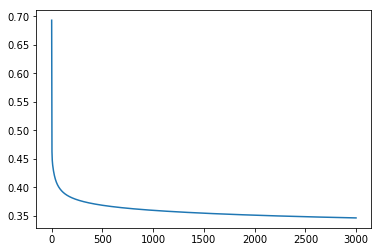

In [163]:
data = Data(to_train_data)
lr = LR(data.train,3)
lr.train(0.5,3000,0.1)
lr(data.val)

In [ ]:
lr(data.val)

In [105]:
def check(poly):
    df_train = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
    df_val = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
    for i in range(10):
        data = Data(to_train_data)
        lr = LR(data.train,poly)
        lr.train(0,1000,0.1)
        df_train = df_train.append(lr(data.train),ignore_index=True)
        df_val = df_val.append(lr(data.val),ignore_index=True)
    return df_train, df_val

Iteration0,cost=0.6931471805599453
Iteration100,cost=0.45909165860784734
Iteration200,cost=0.4484636679828994
Iteration300,cost=0.4466017696408435
Iteration400,cost=0.4461174324597212
Iteration500,cost=0.445966816544865
Iteration600,cost=0.445915530645026
Iteration700,cost=0.44589671095515854
Iteration800,cost=0.4458889416870976
Iteration900,cost=0.44588500477954246
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4536924927119919
Iteration200,cost=0.4430578500277794
Iteration300,cost=0.4408769948254162
Iteration400,cost=0.4402355013447742
Iteration500,cost=0.440024076450149
Iteration600,cost=0.4399500069916146
Iteration700,cost=0.4399217509499762
Iteration800,cost=0.43990905232930094
Iteration900,cost=0.4399017076474232
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4603490245656431
Iteration200,cost=0.44961233838208764
Iteration300,cost=0.4476787248732058
Iteration400,cost=0.44717090510500557
Iteration500,cost=0.4470080830675034
Iteration600,cost=0.4469489396476685
Iter

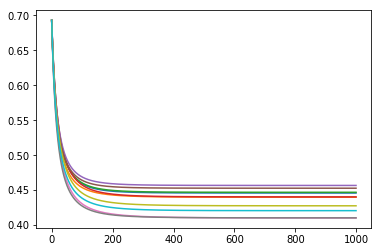

In [66]:
dt,dv = check(1)

In [67]:
dt.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.435139,80.280899,75.643433,70.329033,72.875183
std,0.016936,0.869662,0.862980,2.588257,1.691247
min,0.410263,78.838951,73.964497,66.137566,69.832402
25%,0.422385,79.868914,75.067204,68.599880,71.891652
50%,0.440126,80.243446,75.958781,70.517677,72.916667
75%,0.446652,80.805243,76.318542,71.630781,73.878378
max,0.456730,81.647940,76.530612,75.598086,75.961538


In [68]:
dv.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.456932,79.382022,76.145605,72.014876,73.842097
std,0.036478,1.402620,4.184713,4.815544,2.318558
min,0.407301,77.528090,68.421053,63.380282,69.230769
25%,0.436428,78.230337,75.367893,70.349762,72.866065
50%,0.459196,79.213483,75.952381,71.525097,73.762077
75%,0.473086,80.337079,77.913950,72.934783,75.243498
max,0.527971,82.022472,84.615385,82.539683,77.647059


Iteration0,cost=0.6931471805599453
Iteration100,cost=0.43787663239780455
Iteration200,cost=0.4290392460288541
Iteration300,cost=0.4238544276852186
Iteration400,cost=0.4198318939903201
Iteration500,cost=0.41655557045556746
Iteration600,cost=0.41383180387025026
Iteration700,cost=0.4115323709160309
Iteration800,cost=0.40956579363535167
Iteration900,cost=0.4078648320790638
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4094675988695439
Iteration200,cost=0.40253872669038293
Iteration300,cost=0.39788746005201725
Iteration400,cost=0.39421098562428447
Iteration500,cost=0.39116776900881683
Iteration600,cost=0.3885984839156126
Iteration700,cost=0.3863983749430009
Iteration800,cost=0.3844914043231201
Iteration900,cost=0.3828207013065327
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4499956506808441
Iteration200,cost=0.44144987122089463
Iteration300,cost=0.43568767440998785
Iteration400,cost=0.4311623271860699
Iteration500,cost=0.42748559606343356
Iteration600,cost=0.4244354582610

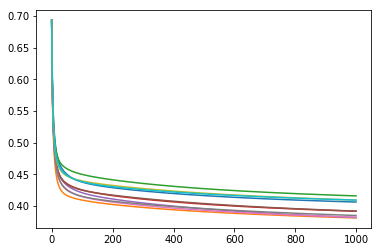

In [69]:
dt2,dv2 = check(2)

In [70]:
dt2.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.395619,83.632959,83.383129,72.050069,77.272717
std,0.013405,0.918261,1.594411,2.477736,1.480715
min,0.381343,82.397004,80.769231,68.627451,75.471698
25%,0.383123,82.958801,82.268603,69.973308,76.128065
50%,0.391988,83.614232,83.684460,72.140523,77.133323
75%,0.408668,84.176030,84.271942,74.256585,78.282828
max,0.416076,85.393258,86.111111,75.242718,79.404467


In [71]:
dv2.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.457927,80.561798,78.328824,66.120383,71.646571
std,0.038130,2.879271,5.280554,3.131824,3.502720
min,0.398061,77.528090,69.491525,61.643836,67.213115
25%,0.433306,77.668539,73.832747,64.127290,68.870192
50%,0.465729,80.337079,79.304193,64.892624,70.479003
75%,0.486738,82.584270,82.554945,68.575871,75.099187
max,0.511268,84.831461,85.185185,71.212121,76.666667


Iteration0,cost=0.6931471805599453
Iteration100,cost=0.3679353483374753
Iteration200,cost=0.3550246958187616
Iteration300,cost=0.34894831074686616
Iteration400,cost=0.345076526725812
Iteration500,cost=0.34228651655859393
Iteration600,cost=0.3401177736710465
Iteration700,cost=0.33833914092676626
Iteration800,cost=0.33682343319193503
Iteration900,cost=0.3354958749657276
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4143972734128415
Iteration200,cost=0.40167619845227615
Iteration300,cost=0.395047019732216
Iteration400,cost=0.39076183576857126
Iteration500,cost=0.3877029891962041
Iteration600,cost=0.38536780121713415
Iteration700,cost=0.38349482791482126
Iteration800,cost=0.38193603253997654
Iteration900,cost=0.3806019753896733
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.41437760060401063
Iteration200,cost=0.39676719874049116
Iteration300,cost=0.3872204458621345
Iteration400,cost=0.38085554650303516
Iteration500,cost=0.3761934858967617
Iteration600,cost=0.37257509214587

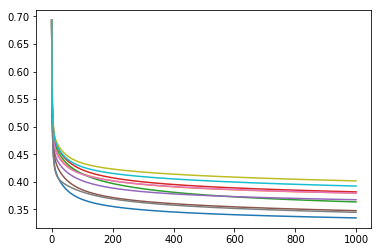

In [159]:
dt3,dv3 = check(3)

In [73]:
dt3.describe()

,cost,accuracy,precision,recall,F1
count,8.000000,10.000000,10.000000,10.000000,10.000000
mean,0.378419,67.191011,69.108426,55.047445,61.249458
std,0.015724,35.426084,36.457170,29.169108,32.350691
min,0.359970,0.000000,0.000000,0.000000,0.000000
25%,0.364822,82.584270,84.205078,63.302326,72.402878
50%,0.378679,83.614232,85.643170,68.264443,76.400134
75%,0.388560,84.597378,87.514029,70.303339,78.045397
max,0.400646,85.767790,89.024390,72.602740,78.651685


In [74]:
dv3.describe()

,cost,accuracy,precision,recall,F1
count,8.000000,10.000000,10.000000,10.000000,10.000000
mean,0.443231,65.617978,65.557399,54.271280,59.207617
std,0.069856,34.709221,35.078491,29.009995,31.430206
min,0.353165,0.000000,0.000000,0.000000,0.000000
25%,0.387978,76.685393,74.353448,60.032864,67.374894
50%,0.450393,81.460674,78.644940,65.945166,72.659933
75%,0.476488,83.988764,84.329811,70.620783,76.989655
max,0.562159,85.393258,94.000000,74.285714,78.787879


Iteration0,cost=0.6931471805599454
Iteration100,cost=0.3838962098866926
Iteration200,cost=0.3718308780391174
Iteration300,cost=0.36481901575307274
Iteration400,cost=0.3595806636447458
Iteration500,cost=0.35536534438519696
Iteration600,cost=0.3518414747725228
Iteration700,cost=0.34881895514525707
Iteration800,cost=0.3461768571277799
Iteration900,cost=0.3438337111005364
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4027958197884521
Iteration200,cost=0.38971663725490313
Iteration300,cost=0.38171751160203277
Iteration400,cost=0.3755645278347774
Iteration500,cost=0.37053108362423287
Iteration600,cost=0.36629504096454046
Iteration700,cost=0.36266177559253726
Iteration800,cost=0.3594991526515508
Iteration900,cost=0.3567126446496852
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.3914301762123977
Iteration200,cost=0.37934009808462754
Iteration300,cost=0.37252583238618564
Iteration400,cost=0.3676740545406943
Iteration500,cost=0.36390567437399174
Iteration600,cost=0.3608369605520

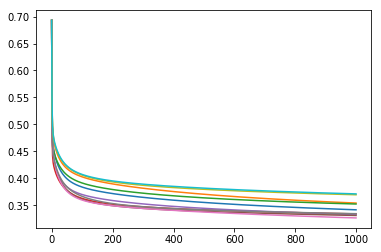

In [75]:
dt4,dv4 = check(4)

In [76]:
dt4.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.344881,85.730337,88.139362,71.761659,79.080571
std,0.016141,1.177114,2.269640,2.765385,2.057780
min,0.326697,83.707865,83.636364,67.346939,75.862069
25%,0.333168,84.878277,87.199480,69.798500,77.828273
50%,0.338134,85.861423,88.696074,71.200980,79.548098
75%,0.353794,86.844569,89.515192,74.202811,80.938511
max,0.371224,86.891386,90.666667,75.728155,81.364829


In [77]:
dv4.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.527788,81.741573,81.803678,68.933282,74.480059
std,0.078716,2.501946,5.881189,5.967940,2.722954
min,0.450156,76.966292,72.222222,60.000000,70.588235
25%,0.465925,80.477528,78.377757,65.406250,72.226794
50%,0.502231,81.460674,81.244004,67.347121,74.835165
75%,0.576650,83.848315,84.958791,73.301282,75.977284
max,0.681371,84.831461,91.836735,78.461538,79.069767


Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4042119336829409
Iteration200,cost=0.37540915407150666
Iteration300,cost=0.36725476967047926
Iteration400,cost=0.3618412209133038
Iteration500,cost=0.35798506842225947
Iteration600,cost=0.3551008298231048
Iteration700,cost=0.3527304573463988
Iteration800,cost=0.3507032648950709
Iteration900,cost=0.34894295916747164
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4327022063601594
Iteration200,cost=0.4114941080014373
Iteration300,cost=0.3983517623544962
Iteration400,cost=0.38896654806023245
Iteration500,cost=0.38230118107475763
Iteration600,cost=0.3774015110085684
Iteration700,cost=0.3736203476081827
Iteration800,cost=0.3705727195474024
Iteration900,cost=0.3680286942994709


/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


Iteration0,cost=0.6931471805599453
Iteration100,cost=0.36065872703583607
Iteration200,cost=0.35042273750894526
Iteration300,cost=0.3446581913615217
Iteration400,cost=0.3400175805206053
Iteration500,cost=0.33547393094792244
Iteration600,cost=0.33199426531809273
Iteration700,cost=0.33030281291070657
Iteration800,cost=0.3288769145644389
Iteration900,cost=0.3276237180479608
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.3631642864902916
Iteration200,cost=0.3506462351601548
Iteration300,cost=0.34462646664937036
Iteration400,cost=0.34055221213454495
Iteration500,cost=0.33743834261102534
Iteration600,cost=0.3349003881578593
Iteration700,cost=0.33274724004339534
Iteration800,cost=nan
Iteration900,cost=nan
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.38056169532576695
Iteration200,cost=0.3530118881339838
Iteration300,cost=0.3458910530508804
Iteration400,cost=0.3407133352098197
Iteration500,cost=0.3366828436700092
Iteration600,cost=0.3334198603362655
Iteration700,cost=0.3307042

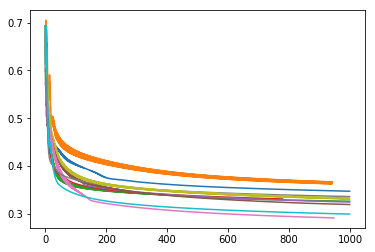

In [78]:
dt5, dv5 = check(5)

In [79]:
dt5.describe()

,cost,accuracy,precision,recall,F1
count,8.000000,10.000000,10.000000,10.000000,10.000000
mean,0.331607,86.423221,87.888719,75.041641,80.923316
std,0.019593,1.264719,1.601755,2.837475,1.655828
min,0.299607,84.269663,85.875706,72.139303,78.787879
25%,0.323388,86.001873,86.791444,72.762460,79.805518
50%,0.329758,86.329588,87.487630,74.705102,80.847157
75%,0.339027,86.657303,88.860649,76.363938,81.720119
max,0.365846,88.576779,90.683230,81.280788,84.398977


In [80]:
dv5.describe()

,cost,accuracy,precision,recall,F1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.515838,80.898876,76.690527,69.366903,72.627083
std,0.076468,2.102055,3.800451,6.437551,3.707197
min,0.413587,76.966292,68.181818,58.461538,66.666667
25%,0.477941,79.213483,75.480769,65.734406,69.219025
50%,0.498321,81.741573,77.746098,70.436280,74.522735
75%,0.581160,82.022472,78.028111,74.365942,75.000000
max,0.637288,83.146067,82.758621,77.419355,76.811594


In [107]:
def check_lambda(lambda_,poly):
    average = []
    for lmd in lambda_:
        df_train = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
        df_val = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
        for i in range(10):
            data = Data(to_train_data)
            lr = LR(data.train,poly)
            lr.train(lmd,1000,0.1)
            df_val = df_val.append(lr(data.val),ignore_index=True)
        average.append(df_val.describe().loc['mean','cost'])
    plt.plot(lambda_,average)
    return average

In [114]:
lmd = [0,0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.5,4,4.5,5,5.5,6,6.5,7]

Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4150832491039407
Iteration200,cost=0.40776490434611
Iteration300,cost=0.40304662553696197
Iteration400,cost=0.39932382138344424
Iteration500,cost=0.39623479911432524
Iteration600,cost=0.3936047301313264
Iteration700,cost=0.3913261030437105
Iteration800,cost=0.3893267853718945
Iteration900,cost=0.3875555788731028
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.3674864953562294
Iteration200,cost=0.35740020744848683
Iteration300,cost=0.3521979259311199
Iteration400,cost=0.3482794259435874
Iteration500,cost=0.34505663864035435
Iteration600,cost=0.3423360344300936
Iteration700,cost=0.3400074916431353
Iteration800,cost=0.3379933604767751
Iteration900,cost=0.3362353347348076
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.459180526382117
Iteration200,cost=0.4512583558463119
Iteration300,cost=0.44542998727233085
Iteration400,cost=0.4406433234543194
Iteration500,cost=0.4366226953016619
Iteration600,cost=0.4331934955019051
Iter

Iteration400,cost=0.4372418946226747
Iteration500,cost=0.43428455606327643
Iteration600,cost=0.431825069013666
Iteration700,cost=0.42974220433057364
Iteration800,cost=0.42795265957425893
Iteration900,cost=0.426396592907145
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.42087237062028615
Iteration200,cost=0.4121886119859715
Iteration300,cost=0.40699462835699984
Iteration400,cost=0.4030680274400412
Iteration500,cost=0.3999490595837149
Iteration600,cost=0.397406823750062
Iteration700,cost=0.3952912383105413
Iteration800,cost=0.39349881771450046
Iteration900,cost=0.3919564375473973
Iteration0,cost=0.6931471805599454
Iteration100,cost=0.4242851769704493
Iteration200,cost=0.4154434671430216
Iteration300,cost=0.410757899163881
Iteration400,cost=0.4071147900160538
Iteration500,cost=0.40409051149273795
Iteration600,cost=0.4015287908884218
Iteration700,cost=0.39933104879835657
Iteration800,cost=0.39742575868459573
Iteration900,cost=0.3957588454144305
Iteration0,cost=0.6931471805599453
It

Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4249539733650344
Iteration200,cost=0.41539019419753415
Iteration300,cost=0.4096693651907883
Iteration400,cost=0.4053132730784218
Iteration500,cost=0.4018241626629533
Iteration600,cost=0.3989671850045514
Iteration700,cost=0.3965910474315027
Iteration800,cost=0.39458943018850906
Iteration900,cost=0.39288477204194855
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4366361744206929
Iteration200,cost=0.4254655689263482
Iteration300,cost=0.4190664444743742
Iteration400,cost=0.414385073329393
Iteration500,cost=0.41075436897556095
Iteration600,cost=0.4078514347627843
Iteration700,cost=0.4054778497449402
Iteration800,cost=0.4035021098672019
Iteration900,cost=0.4018332583868223
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.43485945235138934
Iteration200,cost=0.4237566554366259
Iteration300,cost=0.4169863420904371
Iteration400,cost=0.4119139282566512
Iteration500,cost=0.40792229115186235
Iteration600,cost=0.4046961794970037
It

Iteration800,cost=0.3975040507793963
Iteration900,cost=0.39629191157220645
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4135165896389994
Iteration200,cost=0.40348493774195854
Iteration300,cost=0.39854066492313206
Iteration400,cost=0.3950830803617961
Iteration500,cost=0.39244572006794637
Iteration600,cost=0.3903603372303794
Iteration700,cost=0.3886742968620897
Iteration800,cost=0.3872887131017144
Iteration900,cost=0.3861352747947516
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4275785749851742
Iteration200,cost=0.4194810956909181
Iteration300,cost=0.4151554558541275
Iteration400,cost=0.4119823396493093
Iteration500,cost=0.40949283935876146
Iteration600,cost=0.40748365370914486
Iteration700,cost=0.40583222760916476
Iteration800,cost=0.4044558596251129
Iteration900,cost=0.40329565061178774
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4031001334864649
Iteration200,cost=0.3940566544372871
Iteration300,cost=0.3903273203876475
Iteration400,cost=0.3878395505857791

Iteration0,cost=0.6931471805599453
Iteration100,cost=0.41561740548849374
Iteration200,cost=0.40737319544384964
Iteration300,cost=0.40314173449921353
Iteration400,cost=0.4001144651956584
Iteration500,cost=0.39778547860387026
Iteration600,cost=0.39594101318822594
Iteration700,cost=0.39445384614088125
Iteration800,cost=0.3932385875251395
Iteration900,cost=0.392234675630949
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.44147861253091086
Iteration200,cost=0.4329292719092743
Iteration300,cost=0.42831791885104403
Iteration400,cost=0.4250464250283638
Iteration500,cost=0.42256239012742164
Iteration600,cost=0.4206135487641341
Iteration700,cost=0.41905118292473853
Iteration800,cost=0.4177781922318031
Iteration900,cost=0.41672749028963907
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.44391957666096965
Iteration200,cost=0.4363485294147981
Iteration300,cost=0.4320338288886915
Iteration400,cost=0.4289173291492563
Iteration500,cost=0.42652067949440103
Iteration600,cost=0.424616815921

Iteration800,cost=0.39100855590107136
Iteration900,cost=0.3900848134115138
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.42608781907762844
Iteration200,cost=0.4202518461669469
Iteration300,cost=0.4171525871486592
Iteration400,cost=0.4149358035923362
Iteration500,cost=0.41321283974436984
Iteration600,cost=0.411827285761262
Iteration700,cost=0.4106923320499709
Iteration800,cost=0.4097514774171185
Iteration900,cost=0.4089646570323226
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4296816510153097
Iteration200,cost=0.42283746265604716
Iteration300,cost=0.41911964842821076
Iteration400,cost=0.4164223692113548
Iteration500,cost=0.4143353750390649
Iteration600,cost=0.41267688090031257
Iteration700,cost=0.4113373208620028
Iteration800,cost=0.41024252983753706
Iteration900,cost=0.40933942414618424
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4378194282283979
Iteration200,cost=0.42955664189300674
Iteration300,cost=0.42492267823461505
Iteration400,cost=0.421581852334268

Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4166987991992154
Iteration200,cost=0.4087103827266047
Iteration300,cost=0.40469221016031676
Iteration400,cost=0.4019172412036998
Iteration500,cost=0.3998372917642461
Iteration600,cost=0.3982265594506243
Iteration700,cost=0.3969560267217125
Iteration800,cost=0.3959410776305297
Iteration900,cost=0.39512238100001296
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.42993788897727075
Iteration200,cost=0.4196452226511927
Iteration300,cost=0.41416423611213987
Iteration400,cost=0.4104092167367551
Iteration500,cost=0.4076645304084002
Iteration600,cost=0.40559542700285733
Iteration700,cost=0.40400439174916775
Iteration800,cost=0.40276312531604114
Iteration900,cost=0.4017837609799828
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.44525011420050437
Iteration200,cost=0.4386258856832838
Iteration300,cost=0.4349012143769092
Iteration400,cost=0.4323268812405706
Iteration500,cost=0.43043331803516327
Iteration600,cost=0.428999079203585

Iteration400,cost=0.42615889201413737
Iteration500,cost=0.42421694449899516
Iteration600,cost=0.42270872186274394
Iteration700,cost=0.4215180735557755
Iteration800,cost=0.4205683300376317
Iteration900,cost=0.4198050528945621
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.4122921695424749
Iteration200,cost=0.40522120676608026
Iteration300,cost=0.4018723606785469
Iteration400,cost=0.3996544400218438
Iteration500,cost=0.39802342957031345
Iteration600,cost=0.39677182688087864
Iteration700,cost=0.39579115427793454
Iteration800,cost=0.3950134442040624
Iteration900,cost=0.3943916492607641
Iteration0,cost=0.6931471805599453
Iteration100,cost=0.42866986117983563
Iteration200,cost=0.41940525230583536
Iteration300,cost=0.4141225802740362
Iteration400,cost=0.4104198040779269
Iteration500,cost=0.40769113269107077
Iteration600,cost=0.4056324997866721
Iteration700,cost=0.4040557785955332
Iteration800,cost=0.4028346626680401
Iteration900,cost=0.4018806564943081
Iteration0,cost=0.69314718055994

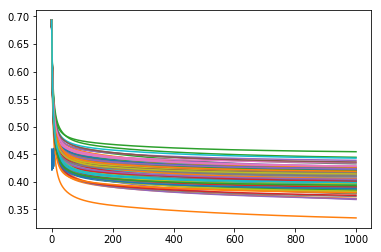

In [115]:
average = check_lambda(lmd,2)

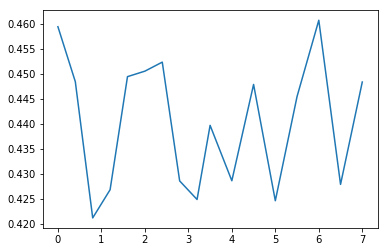

In [116]:
plt.plot(lmd,average)

In [188]:
lr(data.val)

{'F1': 76.52173913043478,
 'accuracy': 84.8314606741573,
 'cost': 0.39410390010102286,
 'precision': 93.61702127659575,
 'recall': 64.70588235294117}

In [187]:
lr(data.test)

{'F1': 69.81132075471697,
 'accuracy': 82.12290502793296,
 'cost': 0.434509966255333,
 'precision': 78.72340425531915,
 'recall': 62.71186440677966}

In [167]:
to_test_data = to_train(datasets[1])

In [171]:
to_test_data['Survived'] = 0
ret = pd.DataFrame(columns=['PassengerId','Survived'])
ret.PassengerId = to_test_data.PassengerId
ret.Survived = np.around(lr.pred(to_test_data))

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]


In [173]:
ret.to_csv('ret.csv',index=False)